<a href="https://colab.research.google.com/github/crissyro/4-sem-university/blob/main/system_modeling/sys_mod_finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats

import re
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data_experiment.csv')
df.drop(['Отметка времени'], axis=1, inplace=True)

print(df.shape)

df.head()

(221, 18)


,Уровень обучения,Направление,Пол,Возраст,"Оцени, насколько часто ты прокрастинируешь в учебе",Насколько прокрастинация мешает тебе учиться?,"Тревожность и стресс: Я избегаю задач, потому что чувствую тревогу или стресс от них.","Мотивация: Я прокрастинирую, когда не вижу смысла в задании.",Наличие дедлайна: Я работаю только когда приближается дедлайн.,Сон: Недостаток сна снижает мою продуктивность и усиливает прокрастинацию.,"Социальные сети: Я часто откладываю дела, уходя в соцсети.",Кофеин: Кофе/энергетики помогают мне начать работу.,Рабочая среда: Мне сложно сосредоточиться в общежитии/доме/кафе и т.д.,"Самооценка: Я прокрастинирую, потому что боюсь сделать плохо.","Усталость: Я слишком устаю, чтобы начать делать задания.",Как часто ты используешь “cramming” (делаешь всё в последний момент)?,Что ты чаще откладываешь?,"Опиши одной фразой, почему ты прокрастинируешь чаще всего"
0,Бакалаврит/Специалитет,Архитектура,Мужской,21,4,3,5,2,3,1,3,1,3,2,5,Иногда,"Повседневные домашки, Курсовые/доклады",Физическое истощение
1,Магистратура,Медицина,Мужской,22,4,5,3,4,5,2,5,2,5,2,5,Всегда,"Курсовые/доклады, Подготовку к экзаменам",Нет внешнего контроля
2,Бакалаврит/Специалитет,Архитектура,Женский,19,4,5,5,5,5,5,2,2,4,3,5,Иногда,Курсовые/доклады,Осознанное откладывание
3,Магистратура,Архитектура,Мужской,23,3,3,5,4,1,4,2,2,1,3,5,Часто,Курсовые/доклады,Лень
4,Магистратура,Архитектура,Женский,22,5,5,5,1,3,1,3,1,3,4,5,Иногда,Повседневные домашки,Любая задача кажется неподъемной


In [4]:
column_mapping = {
    'Уровень обучения': 'education_level',
    'Направление': 'major',
    'Пол': 'gender',
    'Возраст': 'age',
    'Оцени, насколько часто ты прокрастинируешь в учебе': 'procrastination_freq',
    'Насколько прокрастинация мешает тебе учиться?': 'procrastination_impact',
    'Тревожность и стресс: Я избегаю задач, потому что чувствую тревогу или стресс от них.': 'anxiety_stress',
    'Мотивация: Я прокрастинирую, когда не вижу смысла в задании.': 'motivation',
    'Наличие дедлайна: Я работаю только когда приближается дедлайн.': 'deadline_dependency',
    'Сон: Недостаток сна снижает мою продуктивность и усиливает прокрастинацию.': 'sleep_impact',
    'Социальные сети: Я часто откладываю дела, уходя в соцсети.': 'social_media',
    'Кофеин: Кофе/энергетики помогают мне начать работу.': 'caffeine',
    'Рабочая среда: Мне сложно сосредоточиться в общежитии/доме/кафе и т.д.': 'environment',
    'Самооценка: Я прокрастинирую, потому что боюсь сделать плохо.': 'self_esteem',
    'Усталость: Я слишком устаю, чтобы начать делать задания.': 'fatigue',
    'Как часто ты используешь “cramming” (делаешь всё в последний момент)?': 'cramming_freq',
    'Что ты чаще откладываешь?': 'postponed_tasks',
    'Опиши одной фразой, почему ты прокрастинируешь чаще всего': 'procrastination_reason'
}

df = df.rename(columns=column_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   education_level         221 non-null    object
 1   major                   221 non-null    object
 2   gender                  221 non-null    object
 3   age                     221 non-null    int64 
 4   procrastination_freq    221 non-null    int64 
 5   procrastination_impact  221 non-null    int64 
 6   anxiety_stress          221 non-null    int64 
 7   motivation              221 non-null    int64 
 8   deadline_dependency     221 non-null    int64 
 9   sleep_impact            221 non-null    int64 
 10  social_media            221 non-null    int64 
 11  caffeine                221 non-null    int64 
 12  environment             221 non-null    int64 
 13  self_esteem             221 non-null    int64 
 14  fatigue                 221 non-null    int64 
 15  crammi

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,221.0,19.597285,2.599964,16.0,18.0,19.0,21.0,25.0
procrastination_freq,221.0,3.832579,1.046217,1.0,3.0,4.0,5.0,5.0
procrastination_impact,221.0,4.502262,0.760529,2.0,4.0,5.0,5.0,5.0
anxiety_stress,221.0,4.493213,0.742354,2.0,4.0,5.0,5.0,5.0
motivation,221.0,3.398190,1.302025,1.0,3.0,4.0,4.0,5.0
deadline_dependency,221.0,3.746606,1.065598,1.0,3.0,4.0,5.0,5.0
sleep_impact,221.0,2.873303,1.152966,1.0,2.0,3.0,4.0,5.0
social_media,221.0,3.656109,1.242915,1.0,3.0,4.0,5.0,5.0
caffeine,221.0,2.434389,1.070893,1.0,2.0,2.0,3.0,5.0
environment,221.0,3.497738,1.150590,1.0,3.0,4.0,4.0,5.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
education_level,221,3,Колледж,91
major,221,7,Архитектура,68
gender,221,2,Мужской,127
cramming_freq,221,4,Часто,103
postponed_tasks,221,7,Курсовые/доклады,60
procrastination_reason,221,75,Социальные сети вызывают зависимость,8


In [ ]:
df.isnull().sum()

,0
education_level,0
major,0
gender,0
age,0
procrastination_freq,0
procrastination_impact,0
anxiety_stress,0
motivation,0
deadline_dependency,0
sleep_impact,0


<p>В нашем исследовании колонка <code>procrastination_reason</code> содержит бесценную качественную информацию — прямые ответы студентов о том, что мешает им приступать к задачам. Однако эти данные представлены в виде свободного текста, что делает их анализ сложным. Десятки уникальных ответов могут скрывать за собой всего несколько ключевых тем.</p>
<p>Чтобы превратить этот "хаос" из отдельных фраз в структурированное знание, мы применили методы <strong>обработки естественного языка (NLP)</strong> и <strong>машинного обучения</strong>. Наша цель — автоматически сгруппировать схожие по смыслу причины и выявить основные тематические кластеры.</p>
<p>Процесс состоял из четырех ключевых этапов:</p>
<hr>
<h2>Шаг 1: Очистка и подготовка текста (Препроцессинг)</h2>
<p>Компьютер не понимает человеческий язык так, как мы. Фразы "Боюсь неудачи." и "страх провала" для него совершенно разные. Чтобы алгоритм смог уловить смысловую близость, мы должны "унифицировать" текст.</p>
<ul>
<li><strong>Приведение к нижнему регистру:</strong> "Лень" и "лень" становятся одним и тем же словом.</li>
<li><strong>Удаление знаков препинания и цифр:</strong> Слово "задача." превращается в "задача".</li>
<li><strong>Удаление стоп-слов:</strong> Мы убираем слова, не несущие уникальной смысловой нагрузки, такие как <em>"и", "в", "на", "я", "не"</em>. Они встречаются слишком часто и только мешают анализу.</li>
<li><strong>Стемминг:</strong> Это процесс приведения слова к его основе (корню). Например, слова <code>"устал"</code>, <code>"усталость"</code>, <code>"устаю"</code> после стемминга превратятся в единую основу <code>"уста"</code>. Это позволяет алгоритму понять, что все эти слова говорят об одном и том же явлении.</li>
</ul>
<p><strong>Результат этапа:</strong> Каждая причина прокрастинации превращается в очищенный, "нормализованный" набор ключевых слов.</p>
<hr>
<h2>Шаг 2: Векторизация (Превращение слов в числа)</h2>
<p>Математические алгоритмы, такие как кластеризация, работают с числами, а не со словами. Нам нужно представить наш очищенный текст в числовом виде. Для этого мы использовали один из самых эффективных методов — <strong>TF-IDF</strong> (Term Frequency-Inverse Document Frequency).</p>
<ul>
<li><strong>TF (Term Frequency):</strong> Как часто слово встречается в <em>одном конкретном ответе</em>.</li>
<li><strong>IDF (Inverse Document Frequency):</strong> Насколько слово является <em>уникальным и важным</em> во всей совокупности ответов. Слова, которые встречаются почти в каждом ответе (например, "задача"), получают низкий вес. Редкие, но характерные слова (например, "перфекционизм") получают высокий вес.</li>
</ul>
<p><strong>Результат этапа:</strong> Каждая причина теперь представлена в виде числового вектора. Схожие по смыслу причины будут иметь близкие по значению векторы. По сути, мы превратили каждую фразу в <strong>точку в многомерном пространстве</strong>.</p>
<hr>
<h2>Шаг 3: Кластеризация (Автоматический поиск групп)</h2>
<p>Теперь, когда все наши причины являются точками в пространстве, мы можем найти "скопления" или "сгустки" этих точек. Для этого мы использовали алгоритм <strong>K-Means</strong>.</p>
<p>Алгоритм автоматически находит заданное количество (в нашем случае от 2 до 5) центров кластеров и группирует все точки-причины вокруг ближайшего центра. Таким образом, ответы, которые по своему смыслу (и, соответственно, по своим TF-IDF векторам) близки друг к другу, попадают в одну группу.</p>
<p><strong>Результат этапа:</strong> Каждой причине прокрастинации присвоен номер кластера (например, 0, 1, 2...). Мы еще не знаем, <em>что</em> означают эти кластеры, но мы знаем, что внутри каждой группы собраны похожие ответы.</p>
<hr>
<h2>Шаг 4: Визуализация и интерпретация (Придание смысла кластерам)</h2>
<p>Номер кластера сам по себе неинформативен. Чтобы понять, какая тема объединяет причины в каждой группе, мы визуализировали их с помощью <strong>облаков слов (Word Clouds)</strong>.</p>
<p>Для каждого кластера было создано отдельное облако слов. В нем размер слова напрямую зависит от его важности (частоты и уникальности) внутри данной группы. Глядя на самые крупные слова в облаке, мы можем легко интерпретировать и дать название каждой теме.</p>
<ul>
<li>Например, если в облаке для <strong>Кластера 0</strong> мы видим крупные слова <code>"страх"</code>, <code>"неудач"</code>, <code>"ошибк"</code>, <code>"идеальн"</code>, мы можем назвать эту тему <em>"Страх неудачи и перфекционизм"</em>.</li>
<li>Если в <strong>Кластере 1</strong> доминируют слова <code>"лень"</code>, <code>"мотивац"</code>, <code>"сил"</code>, <code>"нет"</code>, то тема — <em>"Отсутствие мотивации и энергии"</em>.</li>
</ul>
<p><strong>Итоговый результат:</strong> Вместо длинного списка из сотен уникальных ответов мы получаем <strong>3-5 четко выделенных, основанных на данных, категорий причин прокрастинации</strong>. Это позволяет нам глубже понять проблему и перейти от частных случаев к общим закономерностям.</p>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


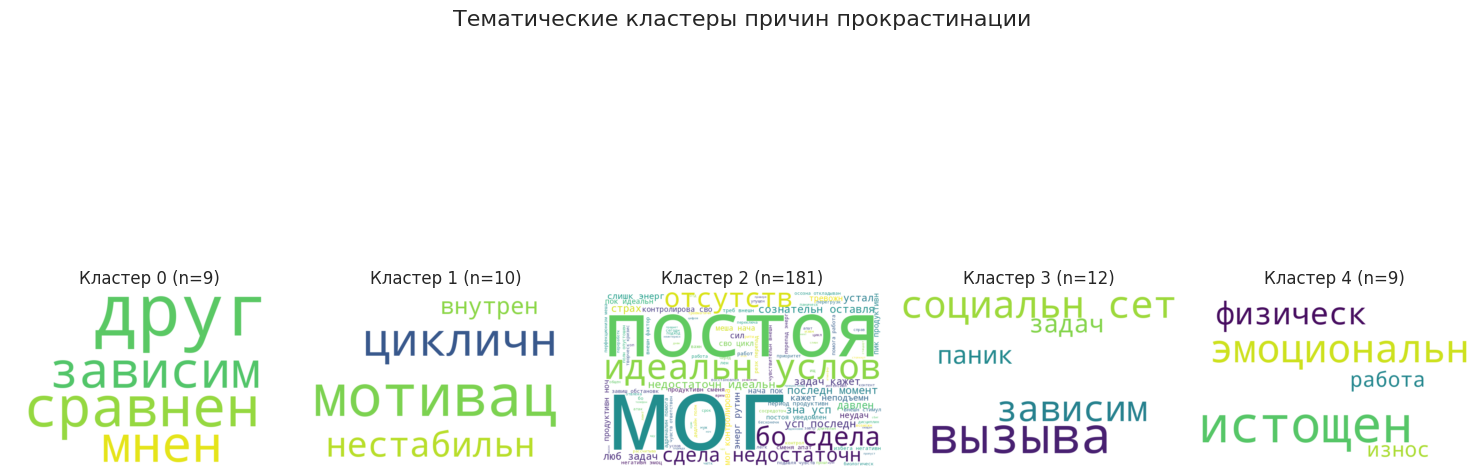


Результаты кластеризации причин:
                             procrastination_reason  cluster
0                              Физическое истощение        4
1                             Нет внешнего контроля        2
2                           Осознанное откладывание        2
3                                              Лень        2
4                  Любая задача кажется неподъемной        2
5                               Цифровая перегрузка        2
6                 Легко переключаюсь между задачами        2
7   Прокрастинирую только по неинтересным предметам        2
8                    Боюсь пропустить что-то важное        2
9                                Отсутствие энергии        2
10               FOMO (страх упущенной возможности)        2
11                Не могу контролировать свои циклы        2
12                         Пик продуктивности ночью        2
13              Подавляющее чувство ответственности        2
14                 Любая задача кажется неподъемной

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
stop_words = stopwords.words('russian')
stemmer = SnowballStemmer('russian')

def preprocess_text(text):
    """
    Функция для очистки и предобработки текста:
    - Удаляет все, кроме букв кириллицы
    - Приводит к нижнему регистру
    - Удаляет стоп-слова
    - Применяет стемминг
    """
    try:
        if pd.isna(text):
            return np.nan

        # Оставляем только кириллицу и пробелы
        text = re.sub(r'[^а-яё\s]', '', str(text).lower())
        # Стемминг и удаление стоп-слов
        words = [stemmer.stem(w) for w in text.split()
                if w not in stop_words and len(w) > 2]

        return ' '.join(words) if words else np.nan
    except:
        return np.nan

def cluster_and_visualize_reasons(df):
    """
    Анализирует текстовые причины прокрастинации, кластеризует их
    и визуализирует результаты в виде облаков слов.
    Не вычисляет веса, а только определяет тематические группы.
    """
    if 'procrastination_reason' not in df.columns:
        raise ValueError("В DataFrame отсутствует необходимая колонка: 'procrastination_reason'")

    # Создаем копию для безопасной работы и добавляем очищенный текст
    analysis_df = df.copy()
    analysis_df['cleaned_text'] = analysis_df['procrastination_reason'].apply(preprocess_text)

    # Отбираем только строки с валидным текстом для анализа
    valid_data = analysis_df.dropna(subset=['cleaned_text']).copy()

    # Проверяем, достаточно ли данных для кластеризации
    if len(valid_data) < 5:
        print("Недостаточно данных для кластеризации (менее 5 валидных текстовых записей).")
        return df # Возвращаем исходный DataFrame без изменений

    try:
        # Векторизация текста с помощью TF-IDF
        tfidf = TfidfVectorizer(
            max_features=200,    # Ограничиваем количество самых частых слов/фраз
            ngram_range=(1, 2),  # Учитываем как отдельные слова, так и пары слов
            min_df=2             # Игнорируем слова, которые встречаются реже, чем в 2 документах
        )
        X = tfidf.fit_transform(valid_data['cleaned_text'])

        # Определяем количество кластеров (не менее 2, не более 5)
        n_clusters = max(2, min(5, len(valid_data) // 5))
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

        # Добавляем номер кластера к каждой причине
        valid_data['cluster'] = kmeans.fit_predict(X)

        # Переносим номера кластеров в основной DataFrame
        df['cluster'] = valid_data['cluster']

        # --- Визуализация кластеров ---
        plt.figure(figsize=(15, 7))
        plt.suptitle('Тематические кластеры причин прокрастинации', fontsize=16)

        sorted_clusters = sorted(valid_data['cluster'].unique())

        for i, cluster_num in enumerate(sorted_clusters):
            # Собираем весь текст из текущего кластера
            cluster_text = ' '.join(valid_data[valid_data['cluster'] == cluster_num]['cleaned_text'])

            # Считаем количество элементов в кластере
            cluster_size = len(valid_data[valid_data['cluster'] == cluster_num])

            # Генерируем облако слов
            wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='viridis').generate(cluster_text)

            plt.subplot(1, len(sorted_clusters), i + 1)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Кластер {cluster_num} (n={cluster_size})')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except Exception as e:
        print(f"Ошибка во время анализа текста: {str(e)}")

    return df

result_df = cluster_and_visualize_reasons(df)

print("\nРезультаты кластеризации причин:")
if 'cluster' in result_df.columns:
    print(result_df[['procrastination_reason', 'cluster']].dropna().head(15))
else:
    print("Колонка 'cluster' не была добавлена.")

<h1>Глубокий анализ прокрастинации: Сравнение по специальностям и уровню образования</h1>
<hr>
<h2>Что показывает этот график?</h2>
<p>Этот график — мощный инструмент для визуального сравнения, который объединяет три ключевых аспекта данных в одной наглядной схеме.</p>
<ol>
<li>
<strong>Распределение по специальностям (Ось X):</strong> По горизонтальной оси расположены все специальности, представленные в выборке. Это основная категория для нашего сравнения.
</li>
<li>
<strong>Уровень прокрастинации (Ось Y):</strong> По вертикальной оси отложена шкала частоты прокрастинации (от 1 до 5). Каждый "ящик" на графике показывает, как распределены значения этого показателя для студентов конкретной специальности.
</li>
<li>
<strong>Разделение по уровню образования (<code>hue='education_level'</code>):</strong> Это "второй уровень" нашего анализа. Внутри каждой специальности мы видим не один, а несколько "ящиков", окрашенных в разные цвета. Каждый цвет соответствует определенному уровню образования (например, Колледж, Бакалавриат, Магистратура). Это позволяет нам напрямую сравнить, например, бакалавров-архитекторов с магистрами-архитекторами.
</li>
</ol>
<h3>Ключевая особенность — умная сортировка</h3>
<p>Обратите внимание, что специальности на графике расположены не в алфавитном порядке. Они отсортированы по <strong>медианному уровню прокрастинации</strong> (от меньшего к большему). Это сделано намеренно и является лучшей практикой в визуализации данных. Такой подход моментально превращает график в <strong>рейтинг</strong>: слева находятся специальности, студенты которых в среднем прокрастинируют меньше всего, а справа — те, для кого эта проблема наиболее актуальна. Это позволяет мгновенно выявить "группы риска".</p>
<hr>
<h2>Как читать "ящик с усами" (Box Plot)?</h2>
<p>Каждый цветной элемент на графике дает массу информации:</p>
<ul>
<li><strong>Линия внутри "ящика":</strong> Это <strong>медиана</strong>. Она делит всех студентов этой группы пополам. 50% студентов прокрастинируют меньше этого уровня, 50% — больше. Это показатель "типичного" студента.</li>
<li><strong>Сам "ящик" (прямоугольник):</strong> Он показывает "основную массу" студентов — <strong>средние 50%</strong> (от 25-го до 75-го перцентиля). Ширина ящика говорит о том, насколько велик разброс мнений в "ядре" группы.</li>
<li><strong>"Усы" (вертикальные линии):</strong> Они показывают почти весь диапазон значений, исключая аномальные выбросы.</li>
<li><strong>Отдельные точки (если есть):</strong> Это <strong>выбросы</strong> — студенты, чей уровень прокрастинации аномально высок или низок по сравнению с остальной группой.</li>
</ul>
<hr>
<h2>Какие выводы можно сделать?</h2>
<p>Анализируя этот график, мы можем ответить на очень конкретные и важные вопросы:</p>
<ul>
<li><strong>Какие специальности наиболее подвержены прокрастинации?</strong> <em>(Смотрим на правую часть графика)</em></li>
<li><strong>Меняется ли склонность к прокрастинации при переходе с бакалавриата на магистратуру?</strong> <em>(Сравниваем цветные ящики внутри одной специальности: поднимается ли медиана?)</em></li>
<li><strong>Одинакова ли эта тенденция для всех специальностей?</strong> <em>(Возможно, у инженеров прокрастинация с опытом падает, а у гуманитариев — растет).</em></li>
<li><strong>В каких группах наблюдается наибольший разброс мнений?</strong> <em>(Ищем самые "высокие" ящики с длинными усами, что говорит о неоднородности группы).</em></li>
</ul>

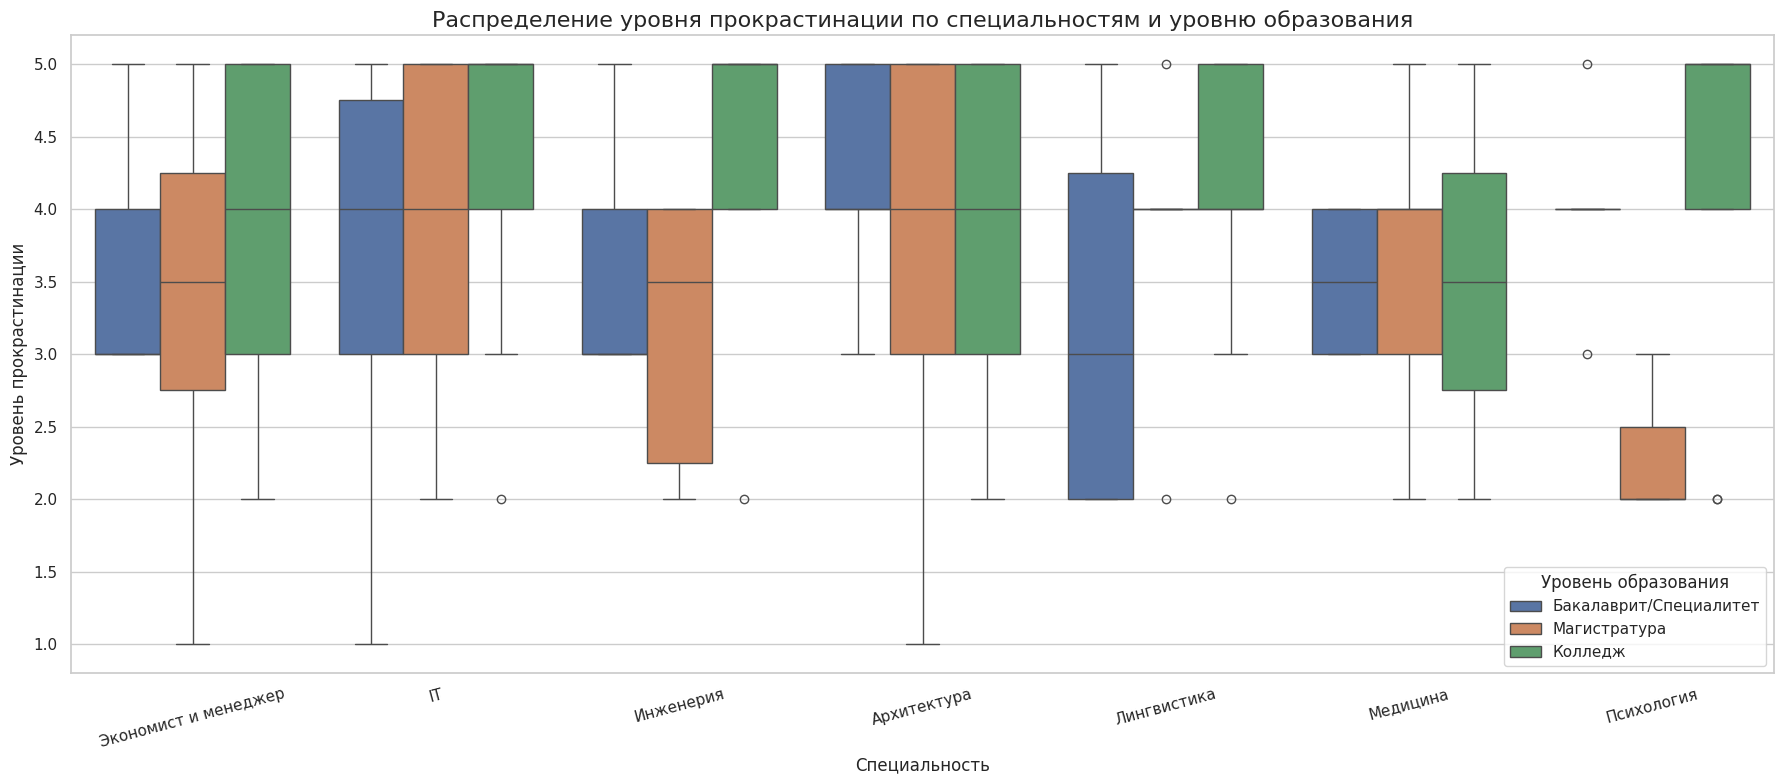

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(
    x='major',
    y='procrastination_freq',
    data=df,
    hue='education_level',
    order=df.groupby('major')['procrastination_freq'].median().sort_values().index
)
plt.title('Распределение уровня прокрастинации по специальностям и уровню образования', fontsize=16)
plt.xticks(rotation=15)
plt.xlabel('Специальность')
plt.ylabel('Уровень прокрастинации')
plt.legend(title='Уровень образования')
plt.tight_layout()
plt.show()

<h1>Карта взаимосвязей: Как все факторы влияют друг на друга?</h1>

<hr>
<h2>Что такое корреляционная матрица и как ее читать?</h2>
<p>В основе этой визуализации лежит <strong>корреляционная матрица</strong> — таблица, где каждая строка и каждый столбец представляют один из числовых факторов нашего исследования (возраст, уровень тревоги, мотивация и т.д.). В ячейке на пересечении строки и столбца находится число — <strong>коэффициент корреляции</strong>, который показывает, насколько эти два фактора связаны.</p>
<p>Тепловая карта превращает эту сложную таблицу в интуитивно понятную картину, используя цвет для кодирования значений. Вот как ее расшифровать:</p>
<h3>1. Цветовая шкала (от синего к красному)</h3>
<ul>
<li><strong style="color: #d62728;">Теплые цвета (красный, оранжевый):</strong> Указывают на <strong>положительную корреляцию</strong>. Это означает: "чем больше одного, тем больше другого". Например, ярко-красная ячейка между <code>anxiety_stress</code> и <code>procrastination_freq</code> говорит о том, что с ростом уровня стресса растет и частота прокрастинации.</li>
<li><strong style="color: #377eb8;">Холодные цвета (синий, голубой):</strong> Указывают на <strong>отрицательную корреляцию</strong>. Это означает: "чем больше одного, тем меньше другого". Например, темно-синяя ячейка между <code>motivation</code> и <code>procrastination_freq</code> показывает, что студенты с высокой мотивацией склонны прокрастинировать реже.</li>
<li><strong>Нейтральные цвета (белый, светло-серый):</strong> Говорят об <strong>отсутствии линейной связи</strong>. Значения этих факторов не зависят друг от друга.</li>
</ul>
<h3>2. Числа в ячейках (<code>annot=True</code>)</h3>
<p>Каждая ячейка содержит точное значение коэффициента корреляции, который варьируется от -1 до +1:</p>
<ul>
<li><strong>+1:</strong> Идеальная положительная связь.</li>
<li><strong>-1:</strong> Идеальная отрицательная связь.</li>
<li><strong>0:</strong> Полное отсутствие связи.</li>
</ul>
<p>Чем ближе значение к 1 (или -1), тем ярче цвет и тем сильнее связь. Значения от 0.5 и выше (или -0.5 и ниже) обычно считаются сильной корреляцией.</p>
<h3>3. Диагональ (<code>1.00</code>)</h3>
<p>Вы заметите, что по диагонали от левого верхнего до правого нижнего угла все ячейки имеют значение 1.00 и окрашены в самый яркий красный цвет. Это логично, ведь любая переменная идеально коррелирует сама с собой.</p>
<hr>

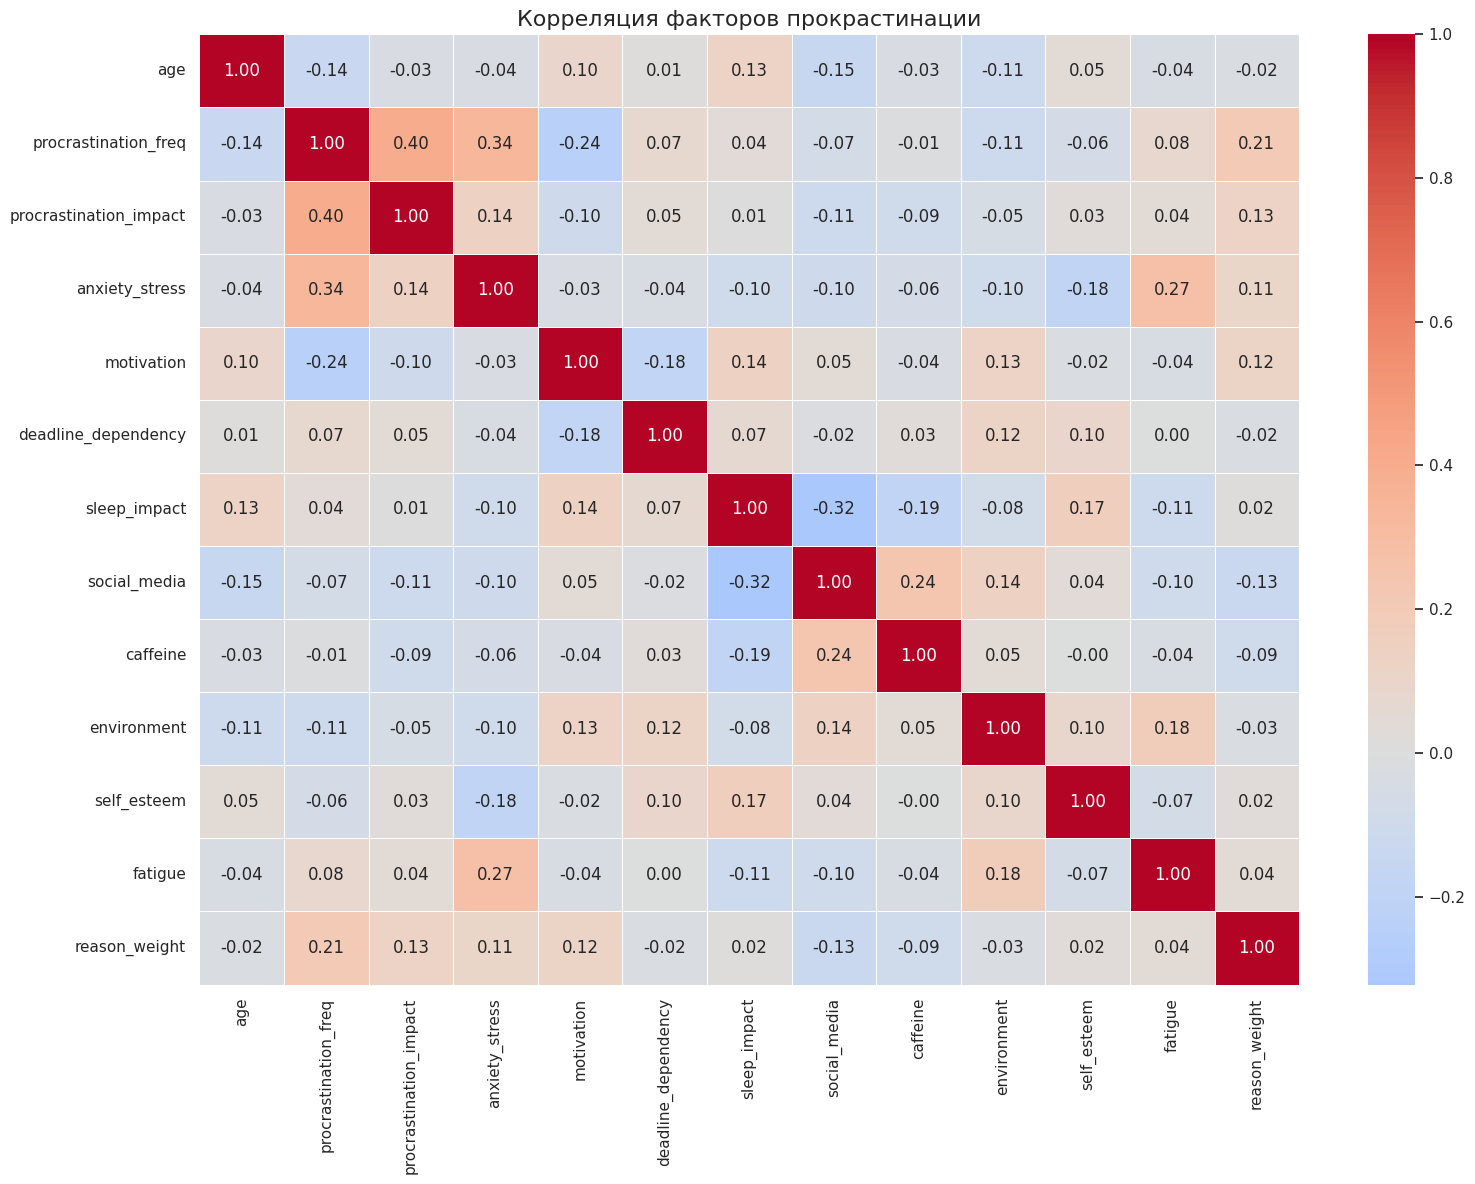

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=.5
)
plt.title('Корреляция факторов прокрастинации', fontsize=16)
plt.tight_layout()
plt.show()

<h1>Паутина прокрастинации: Индивидуальный профиль для каждой специальности</h1>
<p>
    Чтобы понять не просто <em>насколько</em>, а <em>как именно</em> прокрастинируют студенты разных направлений, мы использовали <strong>радиальные (или паутинные) диаграммы</strong>. Этот тип визуализации идеально подходит для создания "профиля" или "портрета", позволяя сравнивать несколько различных факторов для одной группы.
</p>
<p>
    Для каждой специальности была построена своя диаграмма, которая отражает средние значения по ключевым показателям, связанным с прокрастинацией.
</p>
<hr>

<h2>Как читать этот график?</h2>
<ul>
    <li><strong>Оси ("лучи паутины"):</strong> Каждый луч, исходящий из центра, представляет один из факторов: частоту и влияние прокрастинации, уровень тревоги, усталости, влияния соцсетей, потребления кофеина и проблем со сном.</li>
    <li><strong>Синяя область:</strong> Это "профиль" конкретной специальности. Чем дальше эта область простирается вдоль какой-либо оси, тем выше средний балл по этому фактору для студентов данного направления. "Шипы" на профиле указывают на наиболее выраженные проблемы.</li>
    <li><strong>Серая пунктирная линия:</strong> Это — наш <strong>эталон для сравнения</strong>. Она представляет собой усредненный профиль по <em>всем</em> студентам в выборке.</li>
</ul>

<h2>Какие выводы можно сделать?</h2>
<p>
    Сравнивая синюю область с серой линией, мы можем мгновенно ответить на ключевые вопросы:
</p>
<ol>
    <li><strong>В чем уникальность студентов этого направления?</strong> Если синяя область заметно "выпирает" за серую линию на оси "Тревожность", значит, студенты этой специальности в среднем более тревожны, чем остальные.</li>
    <li><strong>Каковы их сильные и слабые стороны?</strong> Если синяя область не доходит до серой линии на оси "Влияние соцсетей", это говорит о том, что для данной группы соцсети являются меньшим отвлекающим фактором.</li>
    <li><strong>Насколько глобальна проблема?</strong> Если синяя фигура целиком больше серой, это указывает на то, что студенты данного направления в целом более подвержены негативным факторам, связанным с прокрастинацией.</li>
</ol>
<p>
    Таким образом, эти графики позволяют нам создать детализированный портрет каждой специальности и понять не только общие тенденции, но и уникальные паттерны поведения и самочувствия студентов.
</p>

In [ ]:
def plot_radar_chart(direction):
    profile_df = df[df['major'] == direction]

    if profile_df.empty:
        print(f"Нет данных для направления: {direction}")
        return

    profile_data = profile_df.mean(numeric_only=True)

    categories = [
        'procrastination_freq', 'procrastination_impact',
        'anxiety_stress', 'fatigue', 'social_media',
        'caffeine', 'sleep_impact'
    ]

    values = profile_data[categories].values.tolist()
    values += values[:1]

    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],
        fill='toself',
        name=direction,
        line=dict(color='royalblue', width=3),
        fillcolor='rgba(65, 105, 225, 0.4)'
    ))

    avg_values = df[categories].mean().values.tolist()
    avg_values += avg_values[:1]

    fig.add_trace(go.Scatterpolar(
        r=avg_values,
        theta=categories + [categories[0]],
        name='Средние значения',
        line=dict(color='gray', dash='dot', width=2),
        opacity=0.6
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 5],
            ),
            angularaxis=dict(
                tickfont=dict(size=12),
                gridcolor='lightgray'
            ),
        ),
        title=dict(
            text=f'Профиль прокрастинации: {direction}',
            x=0.5,
            font=dict(size=20, family='Arial')
        ),
        showlegend=True,
        height=600,
        width=800,
        paper_bgcolor='white',
        plot_bgcolor='white'
    )

    fig.show()

unique_majors = df['major'].unique()

for direction in unique_majors:
    plot_radar_chart(direction)


<hr>

<h2>Что мы видим на графиках?</h2>
<ul>
    <li><strong>Распределение по полу:</strong> Этот график показывает, сколько мужчин и женщин участвовало в опросе. Длина столбца прямо пропорциональна количеству респондентов в каждой группе. Это позволяет нам оценить гендерный баланс выборки.</li>
    <li><strong>Распределение по уровню образования:</strong> Аналогично, второй график демонстрирует, сколько студентов с каждого уровня образования (Колледж, Бакалавриат/Специалитет, Магистратура) мы опросили.</li>
</ul>

<h2>Зачем это нужно?</h2>
<p>
    Анализ этих распределений помогает нам понять:
</p>
<ul>
    <li><strong>Сбалансированность выборки:</strong> Если одна из групп (например, женщины или бакалавры) значительно преобладает, мы должны быть осторожны, обобщая выводы на всю популяцию студентов.</li>
    <li><strong>Контекст для дальнейшего анализа:</strong> Знание состава аудитории помогает правильно интерпретировать последующие результаты. Например, если большинство респондентов — магистры, то и средние показатели будут в большей степени отражать их опыт.</li>
</ul>
<p>
    Эти простые, но важные диаграммы служат отправной точкой нашего исследования, обеспечивая прозрачность и контекст для всех последующих находок.
</p>

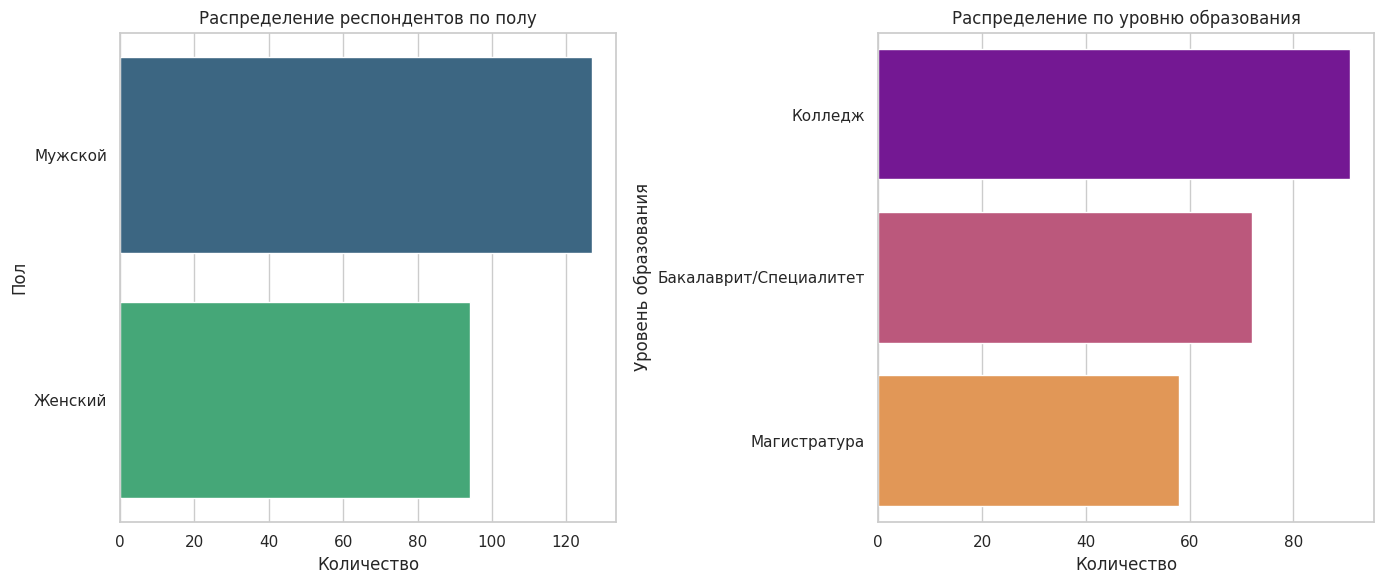

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(y=df['gender'], order=df['gender'].value_counts().index, palette='viridis')
plt.title('Распределение респондентов по полу')
plt.xlabel('Количество')
plt.ylabel('Пол')

plt.subplot(1, 2, 2)
sns.countplot(y=df['education_level'], order=df['education_level'].value_counts().index, palette='plasma')
plt.title('Распределение по уровню образования')
plt.xlabel('Количество')
plt.ylabel('Уровень образования')

plt.tight_layout()
plt.show()

<h1>Возрастной срез: Распределение студентов по возрасту</h1>

<hr>

<h2>Как читать этот график?</h2>
<ul>
    <li><strong>Столбцы (bins):</strong> Вся шкала возрастов разбита на равные интервалы. Высота каждого столбца показывает, сколько студентов попало в данный возрастной диапазон.</li>
    <li><strong>Пик графика:</strong> Самый высокий столбец указывает на наиболее часто встречающийся возраст (или возрастной интервал) в нашей выборке.</li>
    <li><strong>Плавная линия (KDE-кривая):</strong> Это линия ядерной оценки плотности. Она сглаживает гистограмму и помогает лучше увидеть общую форму распределения, игнорируя случайные "шумы".</li>
</ul>

<h2>Какие выводы можно сделать?</h2>
<p>
    Гистограмма возраста позволяет нам понять:
</p>
<ol>
    <li><strong>Ядро аудитории:</strong> Мы можем четко определить основной возраст наших респондентов (например, 19-22 года).</li>
    <li><strong>Форма распределения:</strong> Является ли оно симметричным? Или "скошено" в сторону более молодых или более взрослых студентов? Это может быть связано с преобладанием студентов определенных курсов.</li>
    <li><strong>Наличие разных групп:</strong> Несколько пиков на графике могли бы указывать на наличие в выборке нескольких различных возрастных групп (например, студенты, поступившие сразу после школы, и те, кто получает второе высшее образование).</li>
</ol>
<p>
    Этот график завершает наш демографический анализ, давая полное представление о том, кого мы изучаем.
</p>

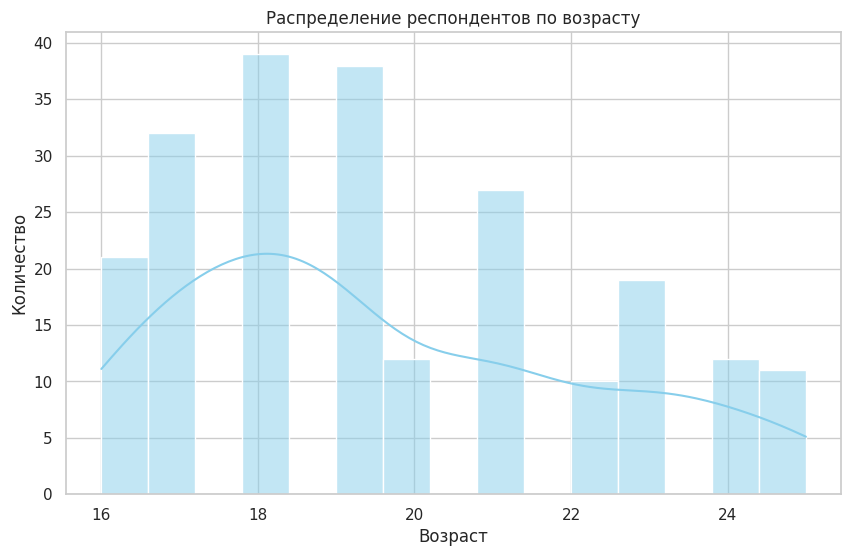

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
plt.title('Распределение респондентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

<h1>Масштаб проблемы: Насколько сильно и часто студенты прокрастинируют?</h1>

<hr>

<h2>Что мы видим на графиках?</h2>
<ul>
    <li><strong>Частота прокрастинации:</strong> Первый график отвечает на вопрос "Как часто вы прокрастинируете?". Высота столбцов показывает, сколько студентов выбрали ту или иную оценку, где 1 — "очень редко", а 5 — "почти всегда".</li>
    <li><strong>Влияние прокрастинации:</strong> Второй график иллюстрирует ответы на вопрос "Насколько прокрастинация мешает вам?". Здесь 1 означает "совсем не мешает", а 5 — "очень мешает".</li>
</ul>

<h2>Как их интерпретировать?</h2>
<p>
    Ключ к пониманию этих графиков — это <strong>форма распределения</strong>.
</p>
<ul>
    <li><strong>Смещение вправо (высокие столбцы у оценок 4 и 5):</strong> Если большинство респондентов выбирают высокие оценки, это является прямым свидетельством того, что прокрастинация — это частая и серьезная проблема для большинства опрошенных студентов.</li>
    <li><strong>Смещение влево (высокие столбцы у оценок 1 и 2):</strong> Такая картина говорила бы о том, что проблема не является массовой.</li>
    <li><strong>Нормальное распределение ("горка" в центре):</strong> Указывает на то, что большинство студентов сталкиваются с прокрастинацией на среднем уровне.</li>
</ul>
<p>
    Эти два графика — это "пульс" нашего исследования. Они дают прямое и недвусмысленное понимание того, насколько актуальна и болезненна тема прокрастинации для целевой аудитории.
</p>

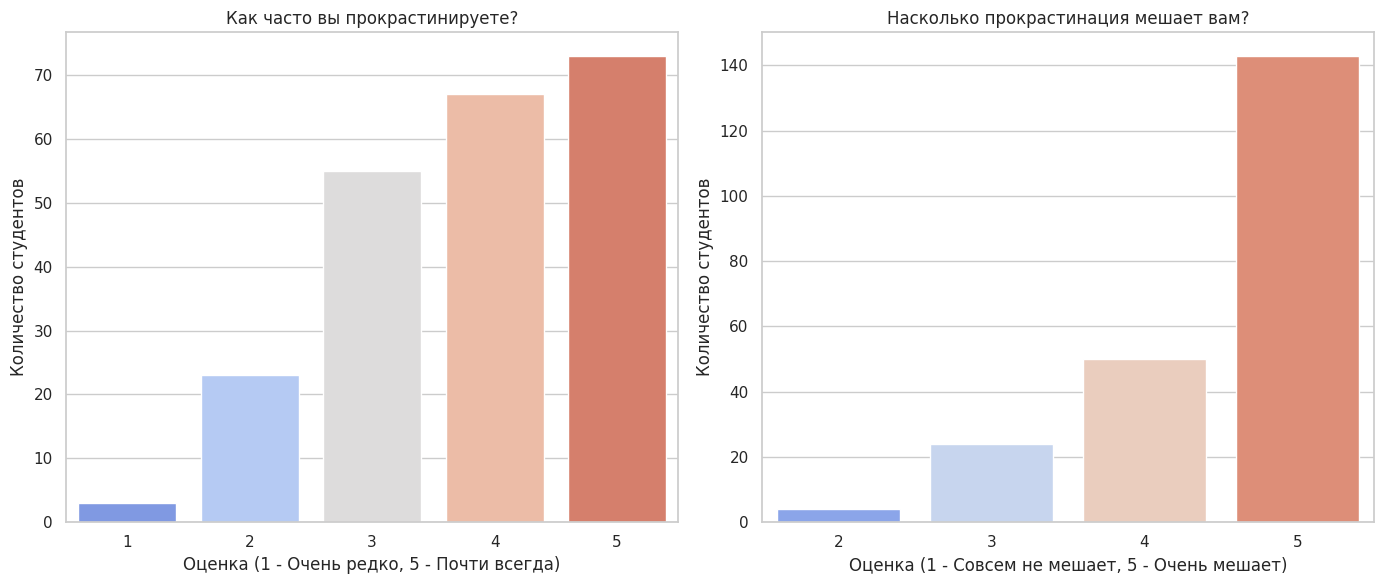

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=df['procrastination_freq'], palette='coolwarm')
plt.title('Как часто вы прокрастинируете?')
plt.xlabel('Оценка (1 - Очень редко, 5 - Почти всегда)')
plt.ylabel('Количество студентов')

plt.subplot(1, 2, 2)
sns.countplot(x=df['procrastination_impact'], palette='coolwarm')
plt.title('Насколько прокрастинация мешает вам?')
plt.xlabel('Оценка (1 - Совсем не мешает, 5 - Очень мешает)')
plt.ylabel('Количество студентов')

plt.tight_layout()
plt.show()

<h1>В поисках закономерностей: Сравниваем прокрастинацию по группам</h1>

<hr>

<h2>Что мы видим на графиках?</h2>
<p>
    Мы построили два сравнительных графика:
</p>
<ol>
    <li><strong>Прокрастинация и пол:</strong> Этот график напрямую сравнивает распределение частоты прокрастинации между мужчинами и женщинами.</li>
    <li><strong>Прокрастинация и уровень образования:</strong> Здесь мы сравниваем студентов колледжей, бакалавриата и магистратуры.</li>
</ol>

<h3>Как читать "ящик с усами"?</h3>
<ul>
    <li><strong>Линия внутри "ящика":</strong> Это <strong>медиана</strong> — "типичное" значение. 50% студентов группы прокрастинируют меньше этого уровня, а 50% — больше.</li>
    <li><strong>Сам "ящик":</strong> Он показывает диапазон, в котором находится "ядро" группы — средние 50% студентов.</li>
    <li><strong>"Усы" (линии):</strong> Показывают почти весь разброс значений, исключая аномалии.</li>
</ul>

<h2>Какие выводы можно сделать?</h2>
<p>
    Сравнивая "ящики" между собой, мы можем сделать важные выводы:
</p>
<ul>
    <li><strong>Сравнение медиан:</strong> Если медианная линия у одной группы расположена выше, чем у другой, это говорит о том, что "типичный" студент в этой группе прокрастинирует чаще.</li>
    <li><strong>Сравнение размеров ящиков:</strong> Широкий "ящик" указывает на большой разброс мнений и неоднородность группы. Узкий ящик говорит о том, что большинство студентов в этой группе имеют схожий уровень прокрастинации.</li>
    <li><strong>Общее расположение:</strong> Если один "ящик с усами" целиком расположен выше другого, это является сильным аргументом в пользу того, что в этой группе проблема прокрастинации стоит острее.</li>
</ul>
<p>
    Эти графики позволяют нам перейти от общих цифр к поиску конкретных групп риска и проверке первых гипотез о факторах, влияющих на склонность к прокрастинации.
</p>

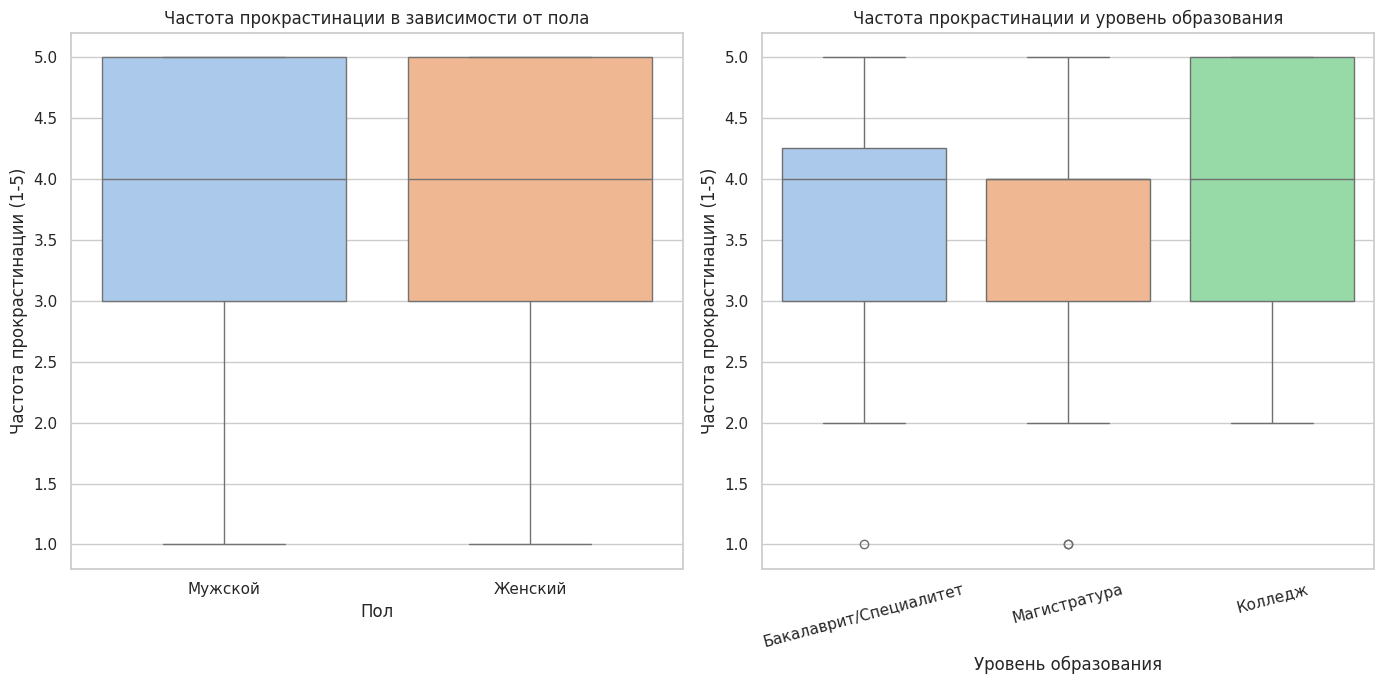

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='procrastination_freq', data=df, palette='pastel')
plt.title('Частота прокрастинации в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Частота прокрастинации (1-5)')

plt.subplot(1, 2, 2)
sns.boxplot(x='education_level', y='procrastination_freq', data=df, palette='pastel')
plt.title('Частота прокрастинации и уровень образования')
plt.xlabel('Уровень образования')
plt.ylabel('Частота прокрастинации (1-5)')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

<h3>Гипотеза 1: Различие в уровне прокрастинации между полами</h3>
<p>Визуальный анализ мог показать небольшие различия в медианных значениях прокрастинации между мужчинами и женщинами. Проверим, является ли это различие статистически значимым.</p>
<ul>
<li><b>Нулевая гипотеза (H₀):</b> Средняя частота прокрастинации (<code>procrastination_freq</code>) одинакова для студентов мужского и женского пола.</li>
<li><b>Альтернативная гипотеза (H₁):</b> Средняя частота прокрастинации статистически значимо различается между студентами мужского и женского пола.</li>
</ul>
<p><b>Метод проверки:</b> Независимый t-тест (Independent Samples t-test), так как мы сравниваем средние значения двух независимых групп.</p>
<hr>

In [ ]:
print("\n### Гипотеза 1: Различие в прокрастинации между полами ###")
male_scores = df[df['gender'] == 'Мужской']['procrastination_freq']
female_scores = df[df['gender'] == 'Женский']['procrastination_freq']

# Проводим t-тест для двух независимых выборок
t_stat, p_value_gender = stats.ttest_ind(male_scores, female_scores, equal_var=False) # equal_var=False (тест Уэлча) более устойчив

print(f"\nСредняя частота прокрастинации (мужчины): {male_scores.mean():.2f}")
print(f"Средняя частота прокрастинации (женщины): {female_scores.mean():.2f}")

print(f"\nt-статистика: {t_stat:.4f}")
print(f"p-value: {p_value_gender:.4f}")

if p_value_gender < 0.05:
    print("\nРезультат: p < 0.05. Отвергаем нулевую гипотезу. Существуют статистически значимые различия.\n")
else:
    print("\nРезультат: p >= 0.05. Не удалось отвергнуть нулевую гипотезу. Статистически значимых различий не обнаружено.\n")


### Гипотеза 1: Различие в прокрастинации между полами ###

Средняя частота прокрастинации (мужчины): 3.83
Средняя частота прокрастинации (женщины): 3.83

t-статистика: 0.0339
p-value: 0.9730

Результат: p >= 0.05. Не удалось отвергнуть нулевую гипотезу. Статистически значимых различий не обнаружено.



<h3>Гипотеза 2: Влияние уровня образования на прокрастинацию</h3>
<p>Можно предположить, что студенты разных уровней образования (колледж, бакалавриат, магистратура) сталкиваются с разным уровнем академической нагрузки и стресса, что может влиять на частоту прокрастинации.</p>
<ul>
<li><b>Нулевая гипотеза (H₀):</b> Средняя частота прокрастинации не различается между студентами разных уровней образования.</li>
<li><b>Альтернативная гипотеза (H₁):</b> Существует статистически значимое различие в средней частоте прокрастинации хотя бы между двумя из групп по уровню образования.</li>
</ul>
<p><b>Метод проверки:</b> Однофакторный дисперсионный анализ (ANOVA), так как мы сравниваем средние значения трех и более независимых групп.</p>
<hr>

In [ ]:
print("\n### Гипотеза 2: Влияние уровня образования на прокрастинацию ###")

education_levels = df['education_level'].unique()
grouped_data = [df['procrastination_freq'][df['education_level'] == level] for level in education_levels]

f_stat, p_value_edu = stats.f_oneway(*grouped_data)

print(f"\nУровни образования для сравнения: {list(education_levels)}\n")

print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value_edu:.4f}")

if p_value_edu < 0.05:
    print("\nРезультат: p < 0.05. Отвергаем нулевую гипотезу. Существуют статистически значимые различия в частоте прокрастинации между группами.\n")
else:
    print("\nРезультат: p >= 0.05. Не удалось отвергнуть нулевую гипотезу. Различия между группами статистически не значимы.\n")


### Гипотеза 2: Влияние уровня образования на прокрастинацию ###

Уровни образования для сравнения: ['Бакалаврит/Специалитет', 'Магистратура', 'Колледж']

F-статистика: 4.1444
p-value: 0.0171

Результат: p < 0.05. Отвергаем нулевую гипотезу. Существуют статистически значимые различия в частоте прокрастинации между группами.



<h3>Гипотеза 3: Связь между тревогой и прокрастинацией</h3>
<p>Это одна из самых классических гипотез в психологии. Высокий уровень стресса и тревоги часто парализует и заставляет откладывать задачи.</p>
<ul>
<li><b>Нулевая гипотеза (H₀):</b> Отсутствует корреляция между уровнем тревожности/стресса (<code>anxiety_stress</code>) и частотой прокрастинации (<code>procrastination_freq</code>).</li>
<li><b>Альтернативная гипотеза (H₁):</b> Существует статистически значимая положительная корреляция между уровнем тревожности/стресса и частотой прокрастинации.</li>
</ul>
<p><b>Метод проверки:</b> Ранговая корреляция Спирмена. Она подходит лучше, чем корреляция Пирсона, так как наши данные являются порядковыми (шкалы от 1 до 5) и их распределение может отличаться от нормального.</p>
<hr>

In [ ]:
print("\n### Гипотеза 3: Связь между тревогой и прокрастинацией ###")

corr_anxiety, p_value_anxiety = stats.spearmanr(df['procrastination_freq'], df['anxiety_stress'])

print(f"\nКоэффициент корреляции Спирмена: {corr_anxiety:.4f}")
print(f"p-value: {p_value_anxiety:.4f}")

if p_value_anxiety < 0.05:
    print("\nРезультат: p < 0.05. Отвергаем нулевую гипотезу. Обнаружена статистически значимая корреляция.\n")
    if corr_anxiety > 0:
        print("Тип связи: положительная. С ростом тревожности растет и частота прокрастинации.\n")
    else:
        print("Тип связи: отрицательная. С ростом тревожности частота прокрастинации снижается.\n")
else:
    print("\nРезультат: p >= 0.05. Не удалось отвергнуть нулевую гипотезу. Статистически значимой корреляции не обнаружено.\n")


### Гипотеза 3: Связь между тревогой и прокрастинацией ###

Коэффициент корреляции Спирмена: 0.2944
p-value: 0.0000

Результат: p < 0.05. Отвергаем нулевую гипотезу. Обнаружена статистически значимая корреляция.

Тип связи: положительная. С ростом тревожности растет и частота прокрастинации.



<h3>Гипотеза 4: Связь между мотивацией и прокрастинацией</h3>
<p>Обратная гипотеза: высокая внутренняя или внешняя мотивация должна снижать склонность к прокрастинации.</p>
<ul>
<li><b>Нулевая гипотеза (H₀):</b> Отсутствует корреляция между уровнем мотивации (<code>motivation</code>) и частотой прокрастинации (<code>procrastination_freq</code>).</li>
<li><b>Альтернативная гипотеза (H₁):</b> Существует статистически значимая отрицательная корреляция между уровнем мотивации и частотой прокрастинации.</li>
</ul>
<p><b>Метод проверки:</b> Ранговая корреляция Спирмена.</p>

In [ ]:
print("\n### Гипотеза 4: Связь между мотивацией и прокрастинацией ###")

corr_motivation, p_value_motivation = stats.spearmanr(df['procrastination_freq'], df['motivation'])

print(f"\nКоэффициент корреляции Спирмена: {corr_motivation:.4f}")
print(f"p-value: {p_value_motivation:.4f}")

if p_value_motivation < 0.05:
    print("\nРезультат: p < 0.05. Отвергаем нулевую гипотезу. Обнаружена статистически значимая корреляция.\n")
    if corr_motivation > 0:
        print("Тип связи: положительная. С ростом мотивации растет и частота прокрастинации.\n")
    else:
        print("Тип связи: отрицательная. С ростом мотивации частота прокрастинации снижается.\n")
else:
    print("\nРезультат: p >= 0.05. Не удалось отвергнуть нулевую гипотезу. Статистически значимой корреляции не обнаружено.\n")


### Гипотеза 4: Связь между мотивацией и прокрастинацией ###

Коэффициент корреляции Спирмена: -0.2193
p-value: 0.0010

Результат: p < 0.05. Отвергаем нулевую гипотезу. Обнаружена статистически значимая корреляция.

Тип связи: отрицательная. С ростом мотивации частота прокрастинации снижается.



# Когнитивное моделирование прокрастинации студентов
*Нелинейная нейросетевая модель влияющих факторов*

---

## Описание эксперимента
Я создал когнитивный граф с помощью нейросетевой модели (автоэнкодера) для изучения влияния различных факторов на прокрастинацию студентов.

**Методология:**
- Входной слой: 11 концептов (факторов)
- Скрытый слой: 6 нейронов с ReLU-активацией
- Выходной слой: реконструкция входных концептов

**Данные:**
Ключевые факторы прокрастинации:
- Частота прокрастинации
- Влияние на учёбу
- Тревожность и стресс
- Мотивация
- Усталость

---

## Результаты обучения
| Метрика             | Значение |
|---------------------|----------|
| RMSE                | 0.601    |
| R²                  | 0.694    |
| Эпохи обучения      | 500      |

**Интерпретация:**  
Модель объясняет **69.4% вариативности** в данных. RMSE 0.601 указывает на хорошую точность предсказаний.

---

**Легенда:**
- ➕ Положительное влияние (усиливает)
- ➖ Отрицательное влияние (ослабляет)

**Ключевые наблюдения:**
1. Усталость → Прокрастинация
2. Тревожность → Усталость
3. Кофеин → Мотивация
4. Соцсети → Сон
5. Дедлайны → Продуктивность

---

## Выводы и рекомендации
**Основные драйверы прокрастинации:**
- **Усталость** - главный фактор
- **Тревожность** - усиливает через усталость
- **Качество сна** - фундаментальный аспект

**Противостояние прокрастинации:**
- Кофеин улучшает мотивацию
- Чёткие дедлайны снижают прокрастинацию
- Снижение активности в соцсетях улучшает сон

**Заключение:**  
Эффективные стратегии должны фокусироваться на:
1. Управлении энергией
2. Снижении тревожности
3. Оптимизации сна

---

In [7]:
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.patches as mpatches
from adjustText import adjust_text
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'



--- Начало обучения нелинейной модели ---
Эпоха 50/500, Потеря (Loss): 0.073318
Эпоха 100/500, Потеря (Loss): 0.076060
Эпоха 150/500, Потеря (Loss): 0.038022
Эпоха 200/500, Потеря (Loss): 0.053678
Эпоха 250/500, Потеря (Loss): 0.035324
Эпоха 300/500, Потеря (Loss): 0.058489
Эпоха 350/500, Потеря (Loss): 0.038870
Эпоха 400/500, Потеря (Loss): 0.048115
Эпоха 450/500, Потеря (Loss): 0.022886
Эпоха 500/500, Потеря (Loss): 0.023727
--- Обучение завершено ---

--- Оценка качества на тестовых данных ---
Среднеквадратичная ошибка (RMSE): 0.601
Коэффициент детерминации (R²): 0.694
  -> Модель объясняет 69.4% вариативности.

Визуализация обученной карты влияния...


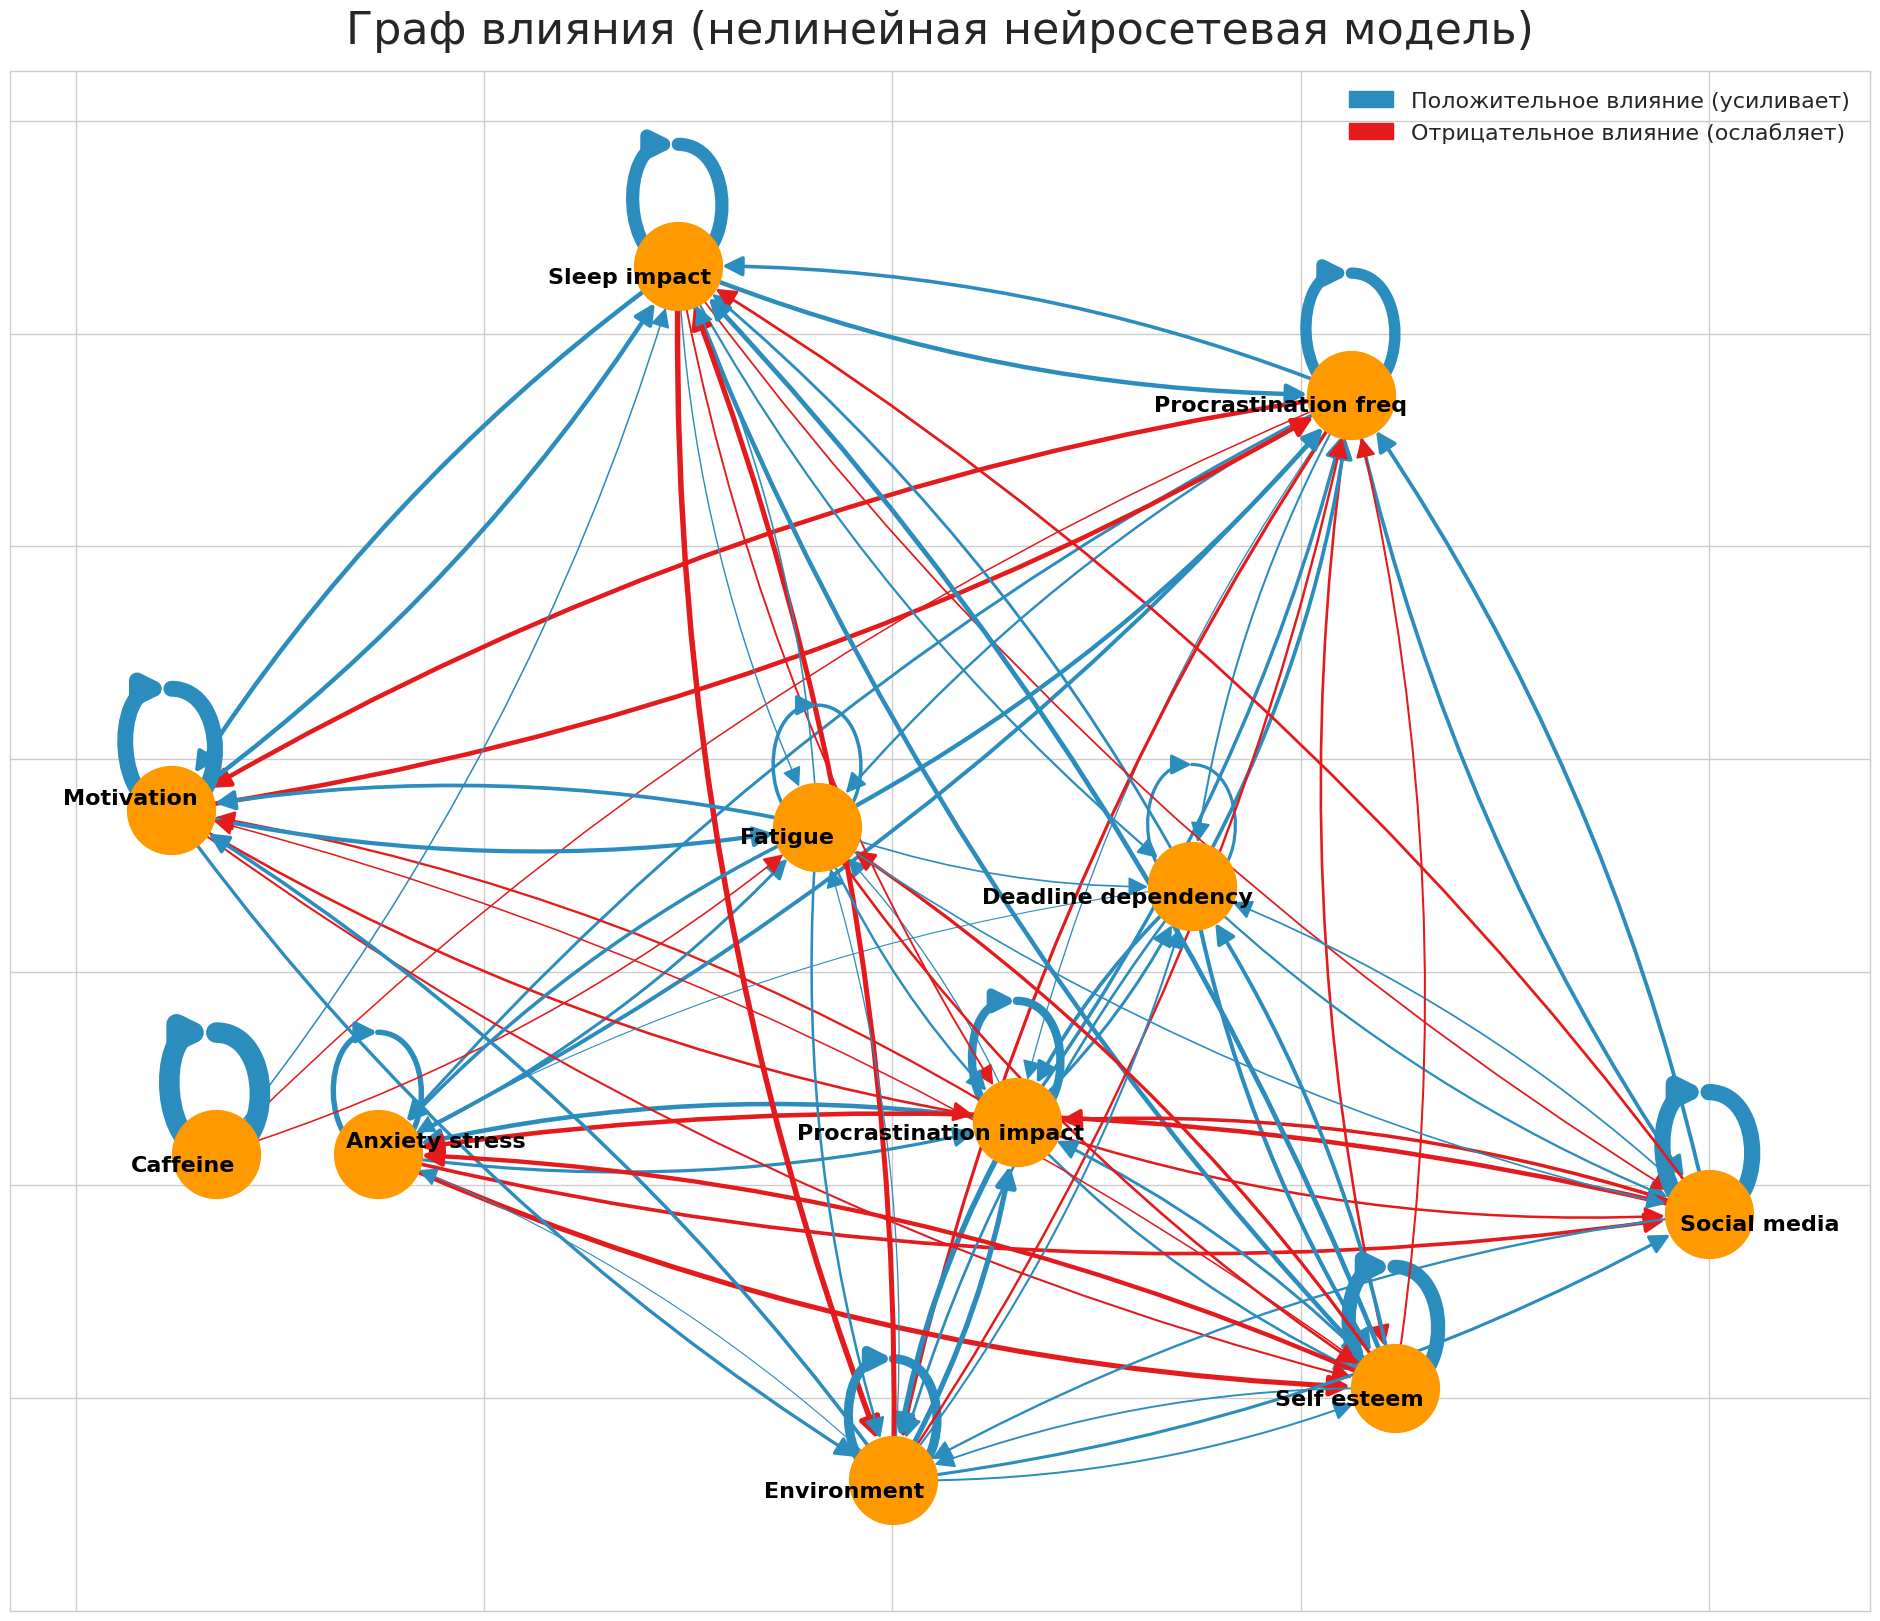

In [11]:
class CognitiveAutoencoder(nn.Module):
    """
    Нейросетевая модель автоэнкодера для когнитивного моделирования.

    Параметры:
        num_concepts (int): Количество концептов/факторов в модели
        hidden_size (int): Размер скрытого слоя (по умолчанию 6)
    """
    def __init__(self, num_concepts, hidden_size=6):
        super().__init__()
        # Энкодер: преобразует входные данные в скрытое представление
        self.encoder = nn.Sequential(
            nn.Linear(num_concepts, hidden_size),
            nn.ReLU()  # Функция активации для нелинейности
        )
        # Декодер: восстанавливает данные из скрытого представления
        self.decoder = nn.Linear(hidden_size, num_concepts)

    def forward(self, x):
        """Прямой проход данных через модель"""
        hidden = self.encoder(x)        # Кодирование в скрытое пространство
        reconstructed = self.decoder(hidden)  # Декодирование обратно
        return reconstructed


class CognitiveMapTrainer:
    """
    Класс для обучения и работы с когнитивной картой на основе автоэнкодера.

    Параметры:
        concepts (list): Список названий концептов/факторов
    """
    def __init__(self, concepts):
        self.concepts = concepts
        # Словарь для быстрого доступа к индексам концептов
        self.concept_map = {name: i for i, name in enumerate(concepts)}
        self.model = None  # Нейросетевая модель
        self.scaler = MinMaxScaler()  # Нормализатор данных
        self.is_trained = False  # Флаг обучения модели

    def train(self, train_df, epochs=300, lr=0.005, weight_decay=1e-4):
        """
        Обучение модели когнитивной карты.

        Параметры:
            train_df (DataFrame): Обучающие данные
            epochs (int): Количество эпох обучения
            lr (float): Скорость обучения
            weight_decay (float): Коэффициент регуляризации L2
        """
        print("\n--- Начало обучения нелинейной модели ---")

        # Нормализация данных
        scaled_data = self.scaler.fit_transform(train_df)
        X_train = torch.FloatTensor(scaled_data)

        # Инициализация модели
        self.model = CognitiveAutoencoder(len(self.concepts))

        # Подготовка DataLoader для пакетной обработки
        train_dataset = TensorDataset(X_train, X_train)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        # Оптимизатор и функция потерь
        optimizer = torch.optim.Adam(
            self.model.parameters(),
            lr=lr,
            weight_decay=weight_decay
        )
        criterion = nn.MSELoss()  # Среднеквадратичная ошибка

        # Цикл обучения
        for epoch in range(epochs):
            for x_batch, y_batch in train_loader:
                optimizer.zero_grad()  # Обнуление градиентов
                y_pred = self.model(x_batch)  # Прямой проход
                loss = criterion(y_pred, y_batch)  # Расчет потерь
                loss.backward()  # Обратное распространение
                optimizer.step()  # Обновление весов

            # Периодический вывод прогресса
            if (epoch + 1) % 50 == 0:
                print(f"Эпоха {epoch+1}/{epochs}, Потеря (Loss): {loss.item():.6f}")

        self.is_trained = True
        print("--- Обучение завершено ---")

    def _simulate_dynamics(self, initial_state, fixed_nodes=None, steps=10):
        """
        Симуляция динамики системы с возможностью фиксации значений.

        Параметры:
            initial_state (dict): Начальное состояние системы
            fixed_nodes (dict): Фиксированные значения концептов
            steps (int): Количество шагов симуляции

        Возвращает:
            dict: Финальное состояние системы
        """
        if fixed_nodes is None:
            fixed_nodes = {}

        # Подготовка начального состояния
        state_df = pd.DataFrame([initial_state], columns=self.concepts)
        scaled_state = self.scaler.transform(state_df)

        # Применение фиксированных значений
        for concept, value in fixed_nodes.items():
            idx = self.concept_map[concept]
            # Нормализация и ограничение значения
            scaled_value = np.clip(
                (value - self.scaler.min_[idx]) / self.scaler.scale_[idx],
                0, 1
            )
            scaled_state[0, idx] = scaled_value

        state_tensor = torch.FloatTensor(scaled_state)
        self.model.eval()  # Переключение в режим оценки

        with torch.no_grad():
            for _ in range(steps):
                # Предсказание следующего состояния
                next_state_pred = self.model(state_tensor)

                # Обновление незафиксированных значений
                for i in range(len(self.concepts)):
                    if self.concepts[i] not in fixed_nodes:
                        state_tensor[0, i] = next_state_pred[0, i]

                # Ограничение значений для стабильности
                state_tensor.clamp_(0, 1)

        # Денормализация результатов
        final_state_unscaled = self.scaler.inverse_transform(state_tensor.cpu().numpy())
        return dict(zip(self.concepts, final_state_unscaled[0]))

    def evaluate(self, test_df, target_concept='procrastination_freq'):
        """
        Оценка качества модели на тестовых данных.

        Параметры:
            test_df (DataFrame): Тестовые данные
            target_concept (str): Целевой концепт для оценки
        """
        if not self.is_trained:
            raise RuntimeError("Модель не обучена.")

        print("\n--- Оценка качества на тестовых данных ---")

        actuals = test_df[target_concept].values
        preds = []

        # Прогнозирование для каждой строки тестовых данных
        for _, row in test_df.iterrows():
            pred_state = self._simulate_dynamics(row.to_dict(), steps=1)
            preds.append(pred_state[target_concept])

        # Расчет метрик качества
        mse = mean_squared_error(actuals, preds)
        rmse = np.sqrt(mse)
        r2 = r2_score(actuals, preds)

        print(f"Среднеквадратичная ошибка (RMSE): {rmse:.3f}")
        print(f"Коэффициент детерминации (R²): {r2:.3f}")

        if r2 > 0:
            print(f"  -> Модель объясняет {r2*100:.1f}% вариативности.")
        else:
            print("  -> Модель работает хуже простого среднего.")

    def visualize_graph(self):
        """
        Визуализация когнитивной карты влияния факторов.
        Строит ориентированный граф с весами связей.
        """
        if not self.is_trained:
            raise RuntimeError("Модель не обучена.")

        print("\nВизуализация обученной карты влияния...")

        # Вычисление матрицы влияния через якобиан
        mean_input = torch.FloatTensor(
            self.scaler.transform(df[self.concepts].mean().values.reshape(1, -1))
        )
        jacobian = torch.autograd.functional.jacobian(self.model, mean_input)
        influence_matrix = jacobian.squeeze().detach().cpu().numpy()

        # Создание графа влияния
        G = nx.from_numpy_array(influence_matrix, create_using=nx.DiGraph)
        nx.relabel_nodes(G, {i: name for i, name in enumerate(self.concepts)}, copy=False)

        # Фильтрация слабых связей
        edges_to_remove = [(u, v) for u, v, w in G.edges(data='weight') if abs(w) < 0.05]
        G.remove_edges_from(edges_to_remove)

        if G.number_of_edges() == 0:
            print("В графе нет значимых связей для визуализации.")
            return

        # Настройка визуализации
        plt.figure(figsize=(24, 20))
        pos = nx.spring_layout(G, k=1.2, iterations=100, seed=42)  # Позиционирование узлов

        # Определение стилей связей
        edge_weights = [d['weight'] for _, _, d in G.edges(data=True)]
        edge_colors = ['#2b8cbe' if w > 0 else '#e41a1c' for w in edge_weights]

        # Отрисовка графа
        nx.draw_networkx(
            G, pos,
            with_labels=False,
            node_color='#ff9900',
            node_size=4000,
            width=[abs(w) * 15 for w in edge_weights],  # Толщина по весу
            edge_color=edge_colors,  # Цвет по знаку влияния
            arrowsize=30,
            connectionstyle='arc3,rad=0.1'  # Изогнутые связи
        )

        # Добавление подписей узлов
        texts = [
            plt.text(
                x, y,
                node.replace('_', ' ').capitalize(),  # Форматирование названий
                fontsize=16,
                fontweight='bold',
                ha='center',
                va='center',
                color='black'
            )
            for node, (x, y) in pos.items()
        ]
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

        # Настройка заголовка и легенды
        plt.title('Граф влияния (нелинейная нейросетевая модель)', fontsize=32, pad=20)
        pos_edge = mpatches.Patch(color='#2b8cbe', label='Положительное влияние (усиливает)')
        neg_edge = mpatches.Patch(color='#e41a1c', label='Отрицательное влияние (ослабляет)')
        plt.legend(handles=[pos_edge, neg_edge], fontsize=16, loc='upper right')
        plt.show()


# Определение концептов для моделирования
concepts_to_model = [
    'procrastination_freq',    # Частота прокрастинации
    'procrastination_impact',  # Влияние прокрастинации на учебу
    'anxiety_stress',          # Уровень тревожности и стресса
    'motivation',              # Уровень мотивации
    'deadline_dependency',     # Зависимость от дедлайнов
    'sleep_impact',            # Влияние сна на продуктивность
    'social_media',            # Активность в соцсетях
    'caffeine',                # Употребление кофеина
    'environment',             # Условия работы/учёбы
    'self_esteem',             # Самооценка
    'fatigue'                  # Уровень усталости
]

# Подготовка данных
train_df, test_df = train_test_split(
    df[concepts_to_model],
    test_size=0.25,
    random_state=42
)

# Инициализация и обучение модели
trainer = CognitiveMapTrainer(concepts=concepts_to_model)
trainer.train(train_df, epochs=500, lr=0.001, weight_decay=1e-4)

# Оценка и визуализация результатов
trainer.evaluate(test_df)
trainer.visualize_graph()